In [1]:
import numpy as np
import matplotlib.pyplot as pl

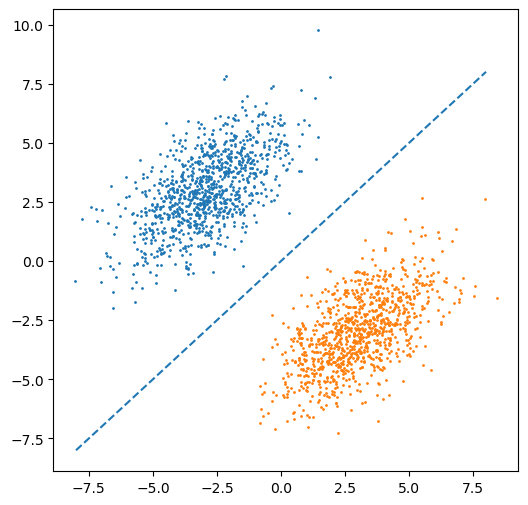

In [6]:
#
# Linearly separable dataset
#
np.random.seed(1)

ang = -45 * np.pi / 180
M = np.array([
    [1.0, 0.0],
    [0.0, 2.0]
]) @ np.array([
    [np.cos(ang), np.sin(ang)],
    [-np.sin(ang), np.cos(ang)]
])
L = 3
x0 = np.random.randn(1000, 2) @ M + np.array([-L, L])
x1 = np.random.randn(1000, 2) @ M + np.array([L, -L])

figure = pl.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1)
ax.scatter(x0[:, 0], x0[:, 1], s=1)
ax.scatter(x1[:, 0], x1[:, 1], s=1)

#
# Separation
#
ax.plot([-8, 8], [-8, 8], '--')
pl.show()

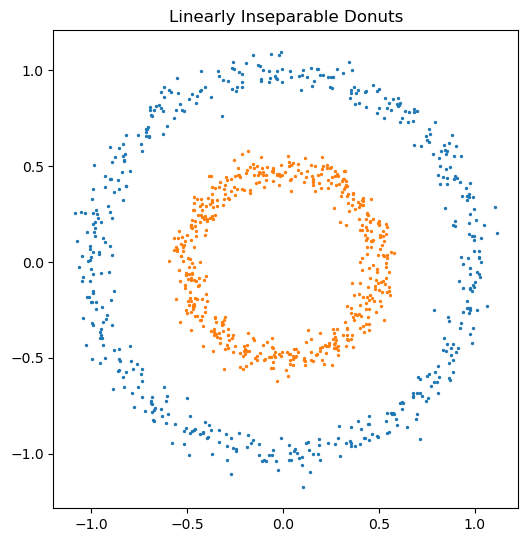

In [16]:
#
# Linearly inseperable dataset
#

import sklearn.datasets

x_donuts, y_donuts = sklearn.datasets.make_circles(1000, noise=0.05, factor=0.5)
x0 = x_donuts[y_donuts == 0]
x1 = x_donuts[y_donuts == 1]

figure = pl.figure(figsize=(6,10))
ax = pl.gca()
ax.scatter(x0[:, 0], x0[:, 1], s=2)
ax.scatter(x1[:, 0], x1[:, 1], s=2)
ax.set_aspect('equal')
ax.set_title('Linearly Inseparable Donuts')
pl.show()

In [18]:
def kernel(x):
    r = np.linalg.norm(x, axis=-1)
    return np.concatenate([x, r[:, None]], axis=-1)
kernel(x_donuts)[:5].round(3)

array([[ 0.123,  0.442,  0.458],
       [-0.18 ,  0.58 ,  0.607],
       [ 0.841,  0.609,  1.038],
       [ 0.281, -0.349,  0.448],
       [-1.   , -0.208,  1.021]])

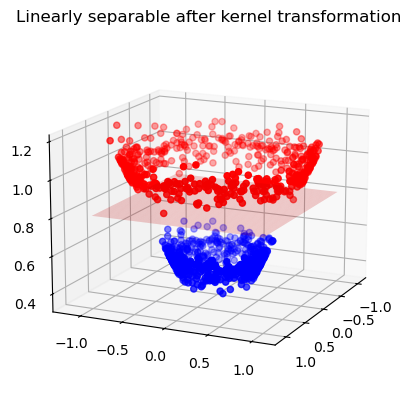

In [19]:
#
# Linear separation in higher dimensions
#

x_new = kernel(x_donuts)
x0_new = x_new[y_donuts == 0]
x1_new = x_new[y_donuts == 1]

fig = pl.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(15, 25)
ax.scatter(x0_new[:,0], x0_new[:,1], x0_new[:,2], c='red')
ax.scatter(x1_new[:,0], x1_new[:,1], x1_new[:,2], c='blue')
ax.set_title('Linearly separable after kernel transformation')

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z = 0 * xx + 0.8
ax.plot_surface(xx, yy, z, alpha=0.2, color='red');

### MLP in Pytorch

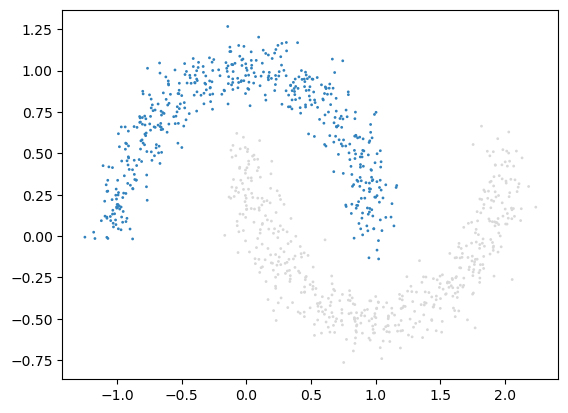

In [22]:
import sklearn.datasets
import pandas as pd

pl.set_cmap('tab20c')
(x_moon, y_moon) = sklearn.datasets.make_moons(1000, noise=0.1)
pl.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, s=1)
pl.show()

In [28]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [38]:
class MLPBinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Softmax(dim=1),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        return self.layers(x)

In [39]:
x_input = torch.tensor(x_moon, device=device, dtype=torch.float32)
y_true = torch.tensor(y_moon, device=device, dtype=torch.float32).reshape(-1,1)

In [44]:
model = MLPBinaryClassifier(2,10).to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss = nn.functional.binary_cross_entropy

loss(model(x_input), y_true)

tensor(0.6893, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)

In [45]:
epochs = 5000
for e in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_input)
    l = loss(y_pred, y_true)
    l.backward()
    optimizer.step()
    if e%1000 == 0:
        print(e, l.item())
print(epochs, l.item())

0 0.6893025636672974
1000 0.0003981466288678348
2000 0.00011459035886218771
3000 4.9015368858817965e-05
4000 2.4357506845262833e-05
5000 1.3030875379627105e-05


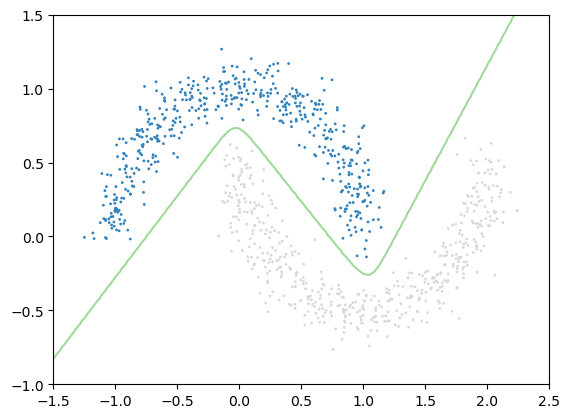

In [ ]:
x_lim = np.linspace(-1.5, 2.5, 100)
y_lim = np.linspace(-1, 1.5, 100)
xx, yy = np.meshgrid(x_lim, y_lim)
x_input = np.array([xx.ravel(), yy.ravel()]).T
x_input = torch.tensor(x_input, dtype=torch.float32, device=device)
x_input.shape

model.eval()
z = model(x_input)
z = z.reshape(100, 100).cpu().detach()

pl.set_cmap('tab20c')
pl.scatter(x_moon[:, 0], x_moon[:, 1], c=y_moon, s=1)
pl.contour(xx, yy, z, levels=1)